<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-2-Classification-1/blob/master/Daniel_Calimayor_Assignment_Logistic_regression_categorical_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

In [2]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [6]:
train_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [0]:
from sklearn.model_selection import train_test_split

In [8]:
x_train = train_features
y_train = train_labels['status_group']

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = .80,
                                                 test_size = .20, stratify = y_train, 
                                                 random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [9]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [10]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [0]:
x_train_num = x_train.select_dtypes('number')
x_val_num = x_val.select_dtypes('number')

In [12]:
x_train_num.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(x_train_num, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = model.predict(x_val_num)
accuracy_score(y_val, y_pred)

0.5546296296296296

In [15]:
model.score(x_val_num, y_val)

0.5546296296296296

In [16]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [17]:
pd.Series(y_pred).value_counts()

functional        10800
non functional     1080
dtype: int64

In [18]:
y_pred_proba = model.predict_proba(x_val_num)
y_pred_proba

array([[0.49945889, 0.07419516, 0.42634595],
       [0.66388077, 0.08727128, 0.24884795],
       [0.5829407 , 0.07133899, 0.34572031],
       ...,
       [0.53203411, 0.06999972, 0.39796617],
       [0.65347997, 0.05874194, 0.28777809],
       [0.30706702, 0.02297016, 0.66996282]])

In [19]:
proba_functional = y_pred_proba[:, 0]
proba_functional

array([0.49945889, 0.66388077, 0.5829407 , ..., 0.53203411, 0.65347997,
       0.30706702])

In [20]:
proba_functional_needs_repair = y_pred_proba[:, 1]
proba_functional_needs_repair

array([0.07419516, 0.08727128, 0.07133899, ..., 0.06999972, 0.05874194,
       0.02297016])

In [21]:
proba_non_functional = y_pred_proba[:, 2]
proba_non_functional

array([0.42634595, 0.24884795, 0.34572031, ..., 0.39796617, 0.28777809,
       0.66996282])

In [0]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [23]:
pd.DataFrame({'Functional': proba_functional, 
              'Functional Needs Repair': proba_functional_needs_repair, 
              'Non Functional': proba_non_functional}).describe()

,Functional,Functional Needs Repair,Non Functional
count,11880.00,11880.00,11880.00
mean,0.54,0.07,0.38
std,0.09,0.04,0.08
min,0.27,0.00,0.00
25%,0.51,0.06,0.35
50%,0.54,0.07,0.39
75%,0.59,0.07,0.41
max,1.00,0.29,0.71


Categorical Features

In [24]:
!pip install category_encoders

In [0]:
import category_encoders as ce

In [26]:
x_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [27]:
x_train['region'].value_counts(dropna=False)

Iringa           4250
Shinyanga        3972
Mbeya            3703
Kilimanjaro      3512
Morogoro         3238
Arusha           2686
Kagera           2615
Mwanza           2485
Kigoma           2276
Pwani            2110
Ruvuma           2090
Tanga            2029
Dodoma           1768
Singida          1678
Tabora           1586
Mara             1560
Rukwa            1440
Mtwara           1384
Manyara          1284
Lindi            1223
Dar es Salaam     631
Name: region, dtype: int64

In [28]:
x_train['quantity'].value_counts(dropna=False)

enough          26567
insufficient    12153
dry              4921
seasonal         3244
unknown           635
Name: quantity, dtype: int64

In [29]:
train = x_train.copy()
train['status_group'] = y_train

train.groupby(['region','quantity'])['status_group'].value_counts(normalize= True)


region         quantity      status_group           
Arusha         dry           non functional            0.95
                             functional                0.05
               enough        functional                0.79
                             non functional            0.17
                             functional needs repair   0.04
               insufficient  functional                0.60
                             non functional            0.34
                             functional needs repair   0.06
               seasonal      functional                0.77
                             non functional            0.17
                             functional needs repair   0.06
               unknown       functional                0.50
                             non functional            0.50
Dar es Salaam  dry           non functional            1.00
               enough        functional                0.72
                             non functional    

Encoder

In [30]:
encoder = ce.OneHotEncoder(use_cat_names = True)
encoded = encoder.fit_transform(x_train['region'], x_train['quantity'])
encoded.sort_index().head(10).T

,0,1,2,4,5,7,8,9,10,11
region_Mbeya,0,0,0,0,0,0,0,0,0,0
region_Iringa,1,0,0,0,0,0,0,0,0,0
region_Pwani,0,0,0,0,0,0,0,0,1,0
region_Kagera,0,0,0,1,0,0,0,1,0,0
region_Dodoma,0,0,0,0,0,0,0,0,0,0
region_Rukwa,0,0,0,0,0,0,0,0,0,0
region_Arusha,0,0,0,0,0,0,0,0,0,0
region_Mwanza,0,0,0,0,0,0,0,0,0,0
region_Mtwara,0,0,0,0,0,0,0,0,0,0
region_Tanga,0,0,0,0,1,0,0,0,0,0


Scale and Validation

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cat_features = ['region']
num_features = x_train.select_dtypes('number').columns.drop('id').tolist()
features = cat_features + num_features

x_train_subset = x_train[features]
x_val_subset = x_val[features]

x_train_encoded = encoder.fit_transform(x_train_subset)
x_val_encoded = encoder.fit_transform(x_val_subset)

x_train_scaled = scaler.fit_transform(x_train_encoded)
x_val_scaled = scaler.fit_transform(x_val_encoded)

model.fit(x_train_scaled, y_train)
print('Validation Accuracy:', model.score(x_train_scaled, y_train))

Validation Accuracy: 0.5733585858585859


In [0]:
coefficients = pd.Series(model.coef_[0], x_train_encoded.columns)

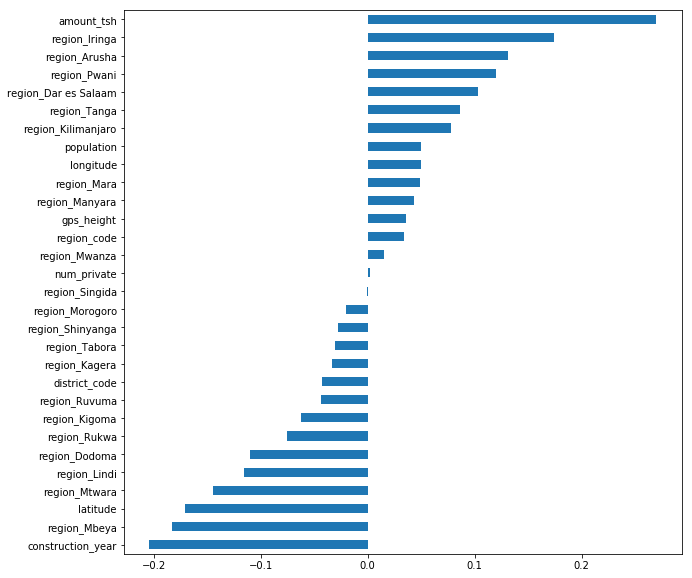

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
coefficients.sort_values().plot.barh();

In [0]:
x_test_subset = test_features[features]
x_test_encoded = encoder.transform(x_test_subset)
x_test_scaled = scaler.transform(x_test_encoded)

In [35]:
all(x_test_encoded.columns == x_train_encoded.columns)

False

In [36]:
x_test_encoded.columns, x_train_encoded.columns

(Index(['region_Kagera', 'region_Kigoma', 'region_Kilimanjaro', 'region_Mwanza',
        'region_Morogoro', 'region_Tabora', 'region_Shinyanga', 'region_Mtwara',
        'region_Dodoma', 'region_Iringa', 'region_Dar es Salaam',
        'region_Tanga', 'region_Arusha', 'region_Pwani', 'region_Mbeya',
        'region_Manyara', 'region_Lindi', 'region_Ruvuma', 'region_Mara',
        'region_Rukwa', 'region_Singida', 'amount_tsh', 'gps_height',
        'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
        'population', 'construction_year'],
       dtype='object'),
 Index(['region_Mbeya', 'region_Iringa', 'region_Pwani', 'region_Kagera',
        'region_Dodoma', 'region_Rukwa', 'region_Arusha', 'region_Mwanza',
        'region_Mtwara', 'region_Tanga', 'region_Kilimanjaro', 'region_Manyara',
        'region_Lindi', 'region_Kigoma', 'region_Morogoro', 'region_Shinyanga',
        'region_Ruvuma', 'region_Tabora', 'region_Mara', 'region_Singida',
        'region_Dar es

In [0]:
y_pred = model.predict(x_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Daniel Calimay0r submission-01.csv', index=False)

In [44]:
!head submission-01.csv

id,status_group
50785,functional needs repair
51630,non functional
17168,functional
45559,non functional
49871,functional
52449,non functional
24806,functional
28965,functional
36301,functional


In [0]:
from google.colab import files
files.download('Daniel Calimay0r submission-01.csv')